### Linear Regression and Sklearn

In [50]:
# Dependencies

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [51]:
# Sklearn Dependency
from sklearn.datasets import make_regression

### Linear Regression Intro

In [52]:
X,y = make_regression(n_samples=20, n_features=1, random_state=0, noise=3, bias=100.0)

In [53]:
# Two dimensional array. This is vertical line. Having 20 rows and 1 column

print(X.shape)
print(type(X))
print(X)

(20, 1)
<class 'numpy.ndarray'>
[[-0.15135721]
 [ 0.40015721]
 [ 0.97873798]
 [-0.85409574]
 [-0.97727788]
 [ 0.3130677 ]
 [-0.10321885]
 [-0.20515826]
 [ 0.33367433]
 [ 1.49407907]
 [ 0.95008842]
 [ 0.12167502]
 [ 1.45427351]
 [ 1.86755799]
 [ 0.14404357]
 [ 0.4105985 ]
 [ 0.76103773]
 [ 2.2408932 ]
 [ 0.44386323]
 [ 1.76405235]]


In [54]:
# One dimensional numpy array

print(y.shape)
print(type(y))
print(y)

(20,)
<class 'numpy.ndarray'>
[ 97.97233911 107.77808686 109.34004068  89.67546479  90.53357417
 101.23052663 102.90854517  95.67147223 103.07477938 121.94427428
 112.62065759 105.93066817 121.29528408 126.04560919 103.76423206
 110.49115189 107.67489197 130.42384782 111.72537749 125.38858708]


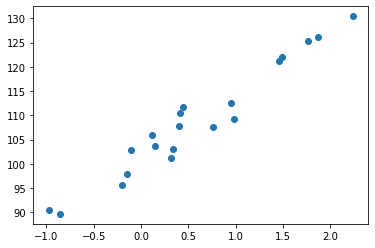

In [55]:
plt.scatter(X,y)

### The standard linear regression looks like this:

<img src="images/linear regression formula.png">

### Not all Regression is Linear

(100, 3)
(100,)


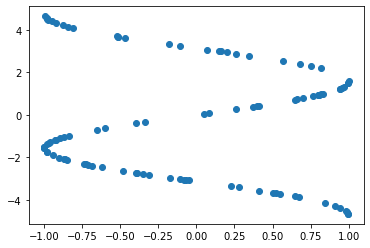

In [56]:
from sklearn.datasets import make_s_curve

data, color = make_s_curve(100, random_state=100)
print(data.shape)
print(color.shape)
plt.scatter(data[:,0], color)

### A regression line is simply calculating a line that best first the data.

This is typically done through the least squares method where the line is chosen to have the smallest overall distance to the points. 

<img src="images/linear regression definition.png">

#### Sklearn libraries provides us with a Linear Regression model that will fit a line to our data. Sklearn allows you to define a model object, fit the model to the data, and then make predictions with the model.

In [57]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()
model

LinearRegression()

In [58]:
# Fit the model

model.fit(X, y) # X and y is used from the Linear Regression intro
print(model)

LinearRegression()


In [59]:
# ask questions about the model: intercept and coefficient
print("Weight's coefficients: ", model.coef_)
print("y_axis intercept: ", model.intercept_)

Weight's coefficients:  [12.91385036]
y_axis intercept:  101.42216879244445


### So now we can update the linear regression formula

y = 101.42216879244445 + 12.91385036x

## Now we can make predictions using the above formula

In [60]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted Output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: 97.97233911361782
Predicted Output: 99.46756445295911
Prediction Error: 1.4952253393412889


In [61]:
pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]

,Predicted,Actual,Error
0,99.467564,97.972339,1.495225
1,106.589739,107.778087,-1.188348
2,114.061445,109.340041,4.721404
3,90.392504,89.675465,0.717039
4,88.801748,90.533574,-1.731826
5,105.465078,101.230527,4.234552
6,100.089216,102.908545,-2.819329
7,98.772786,95.671472,3.101313
8,105.731189,103.074779,2.656410
9,120.716482,121.944274,-1.227792


### In other words, by Predicted - Actual = Error, we can see how 'strong' the margin of error is for the model. 

## Let's take it a step further and find the min and max values

In [62]:
# First obtain the mins and maxes of the actual y and x

x_min = X.min()
x_max = X.max()

y_min_actual = y.min()
y_max_actual = y.max()

### Remember this formula? plug in the x mins and maxes


y = 101.42216879244445 + 12.91385036x

In [63]:
y_min = 101.42216879244445 + 12.91385036 * x_min
y_max = 101.42216879244445 + 12.91385036 * x_max

In [64]:
print("Actual Min Value: {}".format(y_min_actual))
print("Predicted Min Value: {}".format(y_min))
print("Actual Max Value: {}".format(y_max_actual))
print("Predicted Min Value: {}".format(y_max))

Actual Min Value: 89.6754647857102
Predicted Min Value: 88.80174849158243
Actual Max Value: 130.42384782251455
Predicted Min Value: 130.36072823967373


In [65]:
# OPTIONAL: model.predict requires a two dimensional array, however, we are using a one dimensional array (1 column)
# Because of this, we must reshape the array
y_min_predicted = model.predict(x_min.reshape(-1, 1))
y_max_predicted = model.predict(x_max.reshape(-1, 1))

In [66]:
print("Actual Min Value: {}".format(y_min_actual))
print("Predicted Min Value: {}".format(y_min_predicted))
print("Actual Max Value: {}".format(y_max_actual))
print("Predicted Min Value: {}".format(y_max_predicted))

Actual Min Value: 89.6754647857102
Predicted Min Value: [88.80174849]
Actual Max Value: 130.42384782251455
Predicted Min Value: [130.36072825]


### We can show the model fit by plotting the predicted values against the original data

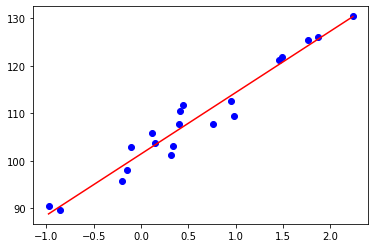

In [68]:
plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')

#### Above, we placed the feature (x) mins and maxes against the outputs(y) mins and maxes.